<a href="https://colab.research.google.com/github/sindyalvinaa/PCVK_Genap_2023/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Akses Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Library

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar morphology.png)

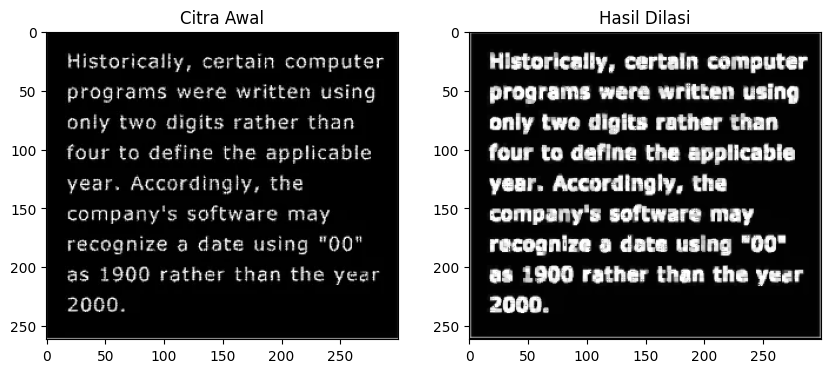

In [3]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/week9/morphology.png', cv2.IMREAD_GRAYSCALE)

kernel = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]], dtype=np.uint8)

dilated_img = np.zeros_like(img)
height, width = img.shape

for i in range(1, height-1):
    for j in range(1, width-1):
        dilated_pixel = np.max(img[i-1:i+2, j-1:j+2] + kernel)
        dilated_img[i, j] = dilated_pixel
        
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Citra Awal')
axs[1].imshow(dilated_img, cmap='gray')
axs[1].set_title('Hasil Dilasi')
plt.show()

4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar morphology.png, dan cetak Structuring Element-nya)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

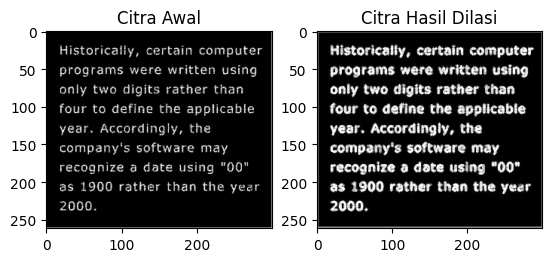

In [16]:
img2 = cv2.imread('/content/drive/MyDrive/PCVK/Images/week9/morphology.png')
kernel = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]], dtype=np.uint8)

dilation = cv2.morphologyEx(img2, cv2.MORPH_DILATE, kernel) 
print(kernel)

plt.subplot(121), plt.imshow(img2), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilation), plt.title('Citra Hasil Dilasi')

5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari open CV, sehingga menghasilkan tampilan seperti dibawah ini: (Gunakan gambar j.png)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


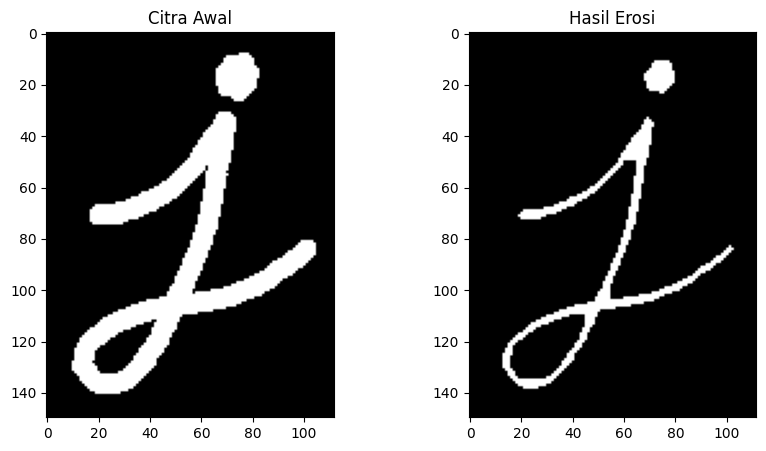

In [5]:
img3 = cv2.imread('/content/drive/MyDrive/PCVK/Images/week9/j.png', cv2.IMREAD_GRAYSCALE)

kernel = np.ones((5, 5), dtype=np.uint8)
eroded_img = np.zeros_like(img3)
height, width = img3.shape

for i in range(2, height-2):
    for j in range(2, width-2):
        eroded_pixel = np.min(img3[i-2:i+3, j-2:j+3] * kernel)
        eroded_img[i, j] = eroded_pixel

print(kernel)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img3, cmap='gray')
axs[0].set_title('Citra Awal')
axs[1].imshow(eroded_img, cmap='gray')
axs[1].set_title('Hasil Erosi')
plt.show()

6.	Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

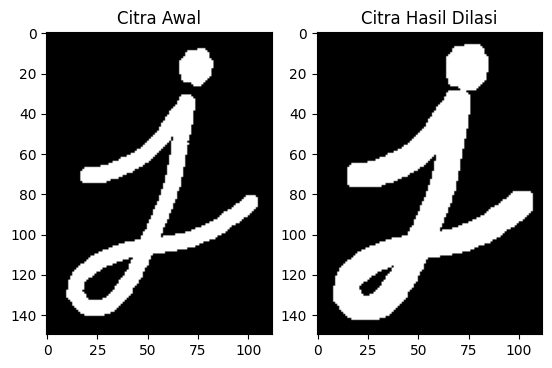

In [6]:
img4 = cv2.imread('/content/drive/MyDrive/PCVK/Images/week9/j.png')

kernel = np.ones((5,5), np.uint8)
dilation = cv2.morphologyEx(img4, cv2.MORPH_DILATE, kernel) 

plt.subplot(121), plt.imshow(img4), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilation), plt.title('Citra Hasil Dilasi')

7.	Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar fingerprint.png)

<ipython-input-7-f960cc1a1602>:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(img5, cmap="gray"),plt.title('Citra Awal')


(<Axes: title={'center': 'Citra Hasil Opening'}>,
 Text(0.5, 1.0, 'Citra Hasil Opening'))

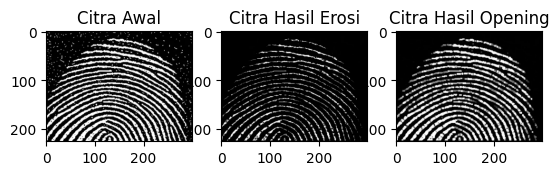

In [7]:
img5 = cv2.imread('/content/drive/MyDrive/PCVK/Images/week9/fingerprint.png', 0)

m, n = img5.shape

plt.imshow(img5, cmap="gray")

k = 3
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

imgErode = np.zeros((m,n), dtype=np.uint8)

for i in range(constant, m-constant): 
  for j in range(constant,n-constant):
    temp = img5[i-constant:i+constant+1, j-constant:j+constant+1] 
    product = temp * SE
    imgErode[i,j] = np.min(product)

img5_2 = imgErode
p, q= img5_2.shape
plt.imshow(img5_2, cmap="gray")
imgDilate = np.zeros((p,q), dtype=np.uint8)
SED = np.ones((k,k), dtype=np.uint8)
constant1 = (k-1)//2

for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp = img5_2[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    imgDilate[i,j] = np.max(product)

plt.subplot(131),plt.imshow(img5, cmap="gray"),plt.title('Citra Awal')
plt.subplot(132),plt.imshow(imgErode, cmap="gray"),plt.title('Citra Hasil Erosi')
plt.subplot(133),plt.imshow(imgDilate, cmap="gray"),plt.title('Citra Hasil Opening')

7.	Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar fingerprint.png)

(<Axes: title={'center': 'Citra Hasil Opening'}>,
 Text(0.5, 1.0, 'Citra Hasil Opening'))

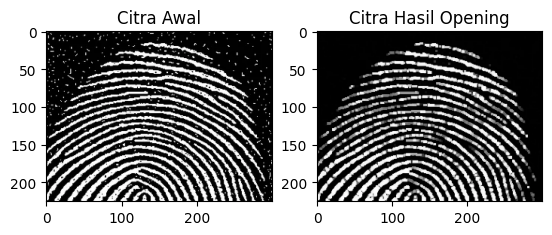

In [8]:
img5l = cv2.imread('/content/drive/MyDrive/PCVK/Images/week9/fingerprint.png')
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(img5l, cv2.MORPH_OPEN, kernel)

plt.subplot(121), plt.imshow(img5l), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(opening), plt.title('Citra Hasil Opening')

8.	Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar fingerprint.png)

<ipython-input-9-1eb69c585394>:35: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(img6, cmap="gray"),plt.title('Citra Awal')


(<Axes: title={'center': 'Citra Hasil Closing'}>,
 Text(0.5, 1.0, 'Citra Hasil Closing'))

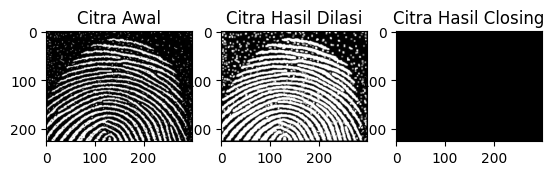

In [9]:
img6 = cv2.imread('/content/drive/MyDrive/PCVK/Images/week9/fingerprint.png', 0)

m, n= img6.shape

plt.imshow(img6, cmap="gray")

imgDilate = np.zeros((m,n), dtype=np.uint8)

SED = np.ones((k,k), dtype=np.uint8)
constant1 = (k-1)//2

for i in range(constant1, m-constant1):
  for j in range(constant1,n-constant1):
    temp = img6[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    imgDilate[i,j] = np.max(product)

img6_2 = imgDilate

m, n = img6_2.shape

plt.imshow(img6_2, cmap="gray")

k = 3
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

imgErode = np.zeros((m,n), dtype=np.uint8)

for i in range(constant, m-constant): 
  for j in range(constant,n-constant):
    temp = img6_2[i-constant:i+constant+1, j-constant:j+constant+1] 
    imgErode[i,j] = np.min(product)

plt.subplot(131),plt.imshow(img6, cmap="gray"),plt.title('Citra Awal')
plt.subplot(132),plt.imshow(imgDilate, cmap="gray"),plt.title('Citra Hasil Dilasi')
plt.subplot(133),plt.imshow(imgErode, cmap="gray"),plt.title('Citra Hasil Closing')

8.	Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar fingerprint.png)

(<Axes: title={'center': 'Citra Hasil Closing'}>,
 Text(0.5, 1.0, 'Citra Hasil Closing'))

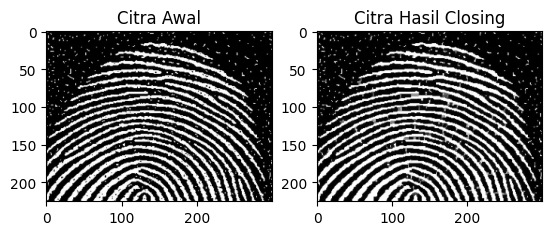

In [10]:
img6l = cv2.imread('/content/drive/MyDrive/PCVK/Images/week9/fingerprint.png')
kernel = np.ones((3,3), np.uint8)
closing = cv2.morphologyEx(img6l, cv2.MORPH_CLOSE, kernel)

plt.subplot(121), plt.imshow(img6l), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(closing), plt.title('Citra Hasil Closing')

9.	Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

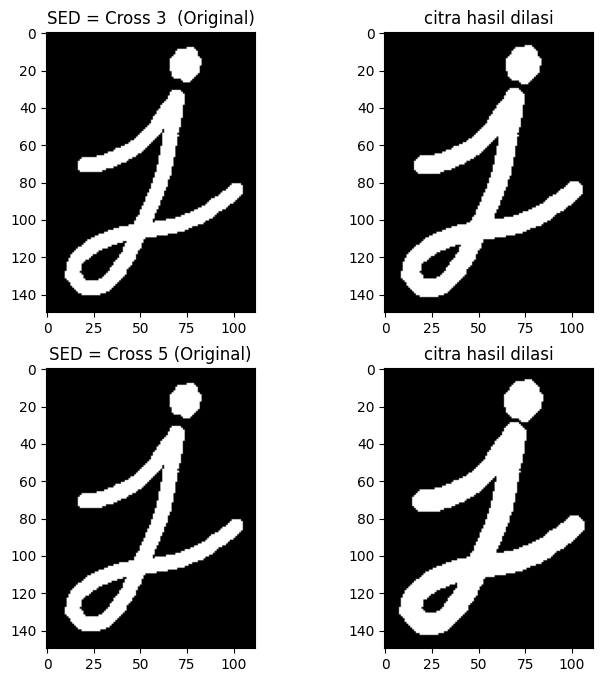

In [11]:
img7 = cv2.imread('/content/drive/MyDrive/PCVK/Images/week9/j.png')

kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
kernel5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))

dilation3 = cv2.dilate(img7, kernel3, iterations=1)

dilation5 = cv2.dilate(img7, kernel5, iterations=1)

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].imshow(img7, cmap='gray')
axs[0, 0].set_title('SED = Cross 3  (Original)')
axs[0, 1].imshow(dilation3, cmap='gray')
axs[0, 1].set_title('citra hasil dilasi')
axs[1, 0].imshow(img7, cmap='gray')
axs[1, 0].set_title('SED = Cross 5 (Original)')
axs[1, 1].imshow(dilation5, cmap='gray')
axs[1, 1].set_title('citra hasil dilasi')
plt.show()

10.	Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

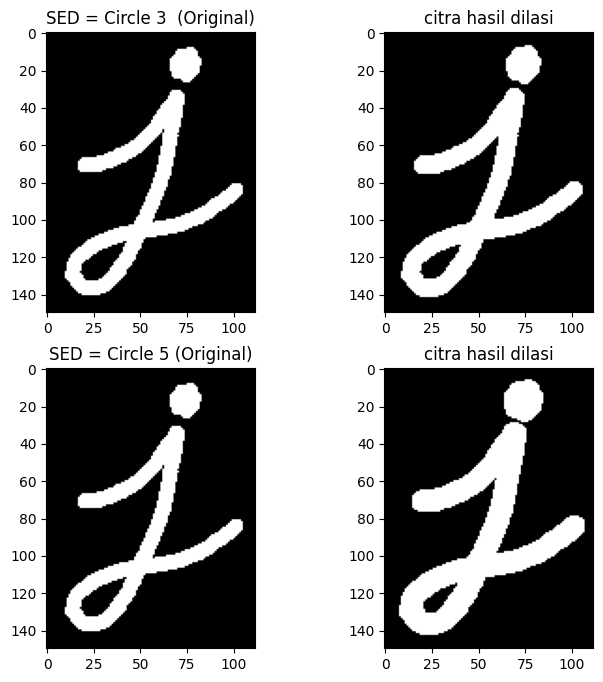

In [12]:
img8 = cv2.imread('/content/drive/MyDrive/PCVK/Images/week9/j.png')

kern6 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
kern7 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

dilation6 = cv2.dilate(img8, kern6, iterations=1)

dilation7 = cv2.dilate(img8, kern7, iterations=1)

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].imshow(img8, cmap='gray')
axs[0, 0].set_title('SED = Circle 3  (Original)')
axs[0, 1].imshow(dilation6, cmap='gray')
axs[0, 1].set_title('citra hasil dilasi')
axs[1, 0].imshow(img8, cmap='gray')
axs[1, 0].set_title('SED = Circle 5 (Original)')
axs[1, 1].imshow(dilation7, cmap='gray')
axs[1, 1].set_title('citra hasil dilasi')
plt.show()

11.	Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

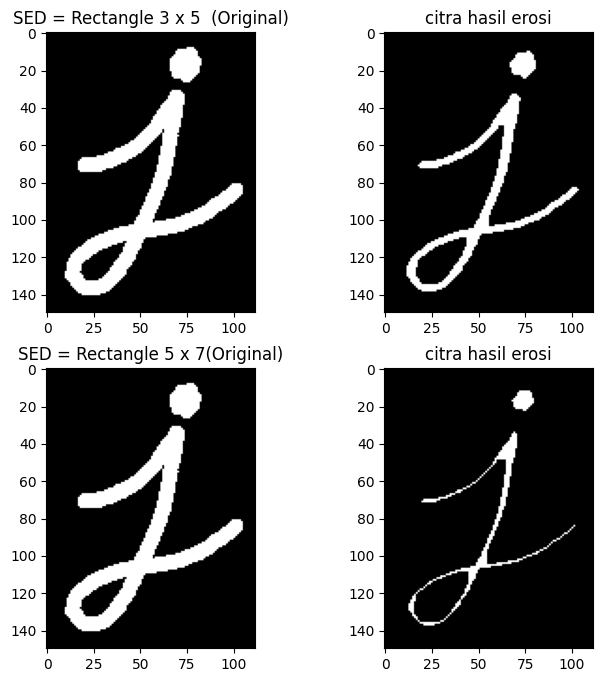

In [13]:
img9 = cv2.imread('/content/drive/MyDrive/PCVK/Images/week9/j.png')

kern8 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,5))
kern9 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,7))

erode8 = cv2.erode(img9, kern8, iterations=1)

erode9 = cv2.erode(img9, kern9, iterations=1)

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].imshow(img9, cmap='gray')
axs[0, 0].set_title('SED = Rectangle 3 x 5  (Original)')
axs[0, 1].imshow(erode8, cmap='gray')
axs[0, 1].set_title('citra hasil erosi')
axs[1, 0].imshow(img9, cmap='gray')
axs[1, 0].set_title('SED = Rectangle 5 x 7(Original)')
axs[1, 1].imshow(erode9, cmap='gray')
axs[1, 1].set_title('citra hasil erosi')
plt.show()

12.	Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

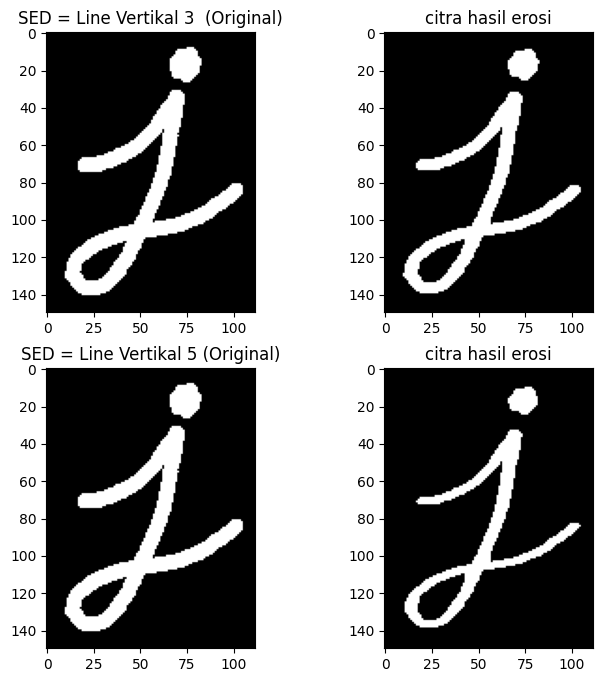

In [14]:
img10 = cv2.imread('/content/drive/MyDrive/PCVK/Images/week9/j.png')

kern1 = np.ones((3,1),np.uint8)
kern2 = np.ones((5,1),np.uint8)  
erosi10 = cv2.morphologyEx(img10, cv2.MORPH_ERODE, kern1)
erosi11 = cv2.morphologyEx(img10, cv2.MORPH_ERODE, kern2)

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].imshow(img10, cmap='gray')
axs[0, 0].set_title('SED = Line Vertikal 3  (Original)')
axs[0, 1].imshow(erosi10, cmap='gray')
axs[0, 1].set_title('citra hasil erosi')
axs[1, 0].imshow(img10, cmap='gray')
axs[1, 0].set_title('SED = Line Vertikal 5 (Original)')
axs[1, 1].imshow(erosi11, cmap='gray')
axs[1, 1].set_title('citra hasil erosi')
plt.show()